In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import comb
import pandas as pd

In [29]:
def friend_deaths(n_friends, tot_deaths, pop=330000000, arr_size=21):
    deaths_prob = [0 for _ in range(arr_size)]
    for deaths in range(arr_size):
        deaths_prob[deaths] = ((n_friends / pop) ** deaths) * (((pop - n_friends) / pop) ** (tot_deaths - deaths)) * (comb(tot_deaths, deaths))
    return deaths_prob

def min_friend_deaths(d_prob):
    min_deaths_prob = [1 for _ in d_prob]
    for i, deaths in enumerate(d_prob):
        for j in range(i + 1, len(min_deaths_prob)):
            min_deaths_prob[j] -= deaths
    return min_deaths_prob

In [91]:
friend_deaths(2000, 500000)

/home/nwasyl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.


[0.04830055570761905,
 0.14636620739404194,
 0.22176788141386786,
 0.22400842261906864,
 0.16970336075410528,
 0.10285032220026741,
 0.05194440254034137,
 0.02248662078796619,
 0.008517591763917951,
 0.0028678475096649498,
 0.0008690343239685625,
 0.0002394000578742028,
 6.045359645435468e-05,
 1.409149462631703e-05,
 3.0500462443185255e-06,
 6.16157439948865e-07,
 1.1669369117874704e-07,
 2.0800474901386092e-08,
 3.501665613670291e-09,
 5.584626435867076e-10,
 8.461284943387081e-11]

In [38]:
min_friend_deaths(friend_deaths(2000, 500000))

/home/nwasyl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.


[1,
 0.951699444292381,
 0.805333236898339,
 0.5835653554844712,
 0.3595569328654026,
 0.1898535721112973,
 0.0870032499110299,
 0.035058847370688526,
 0.012572226582722335,
 0.004054634818804383,
 0.0011867873091394336,
 0.0003177529851708711,
 7.835292729666834e-05,
 1.7899330842313654e-05,
 3.807836215996625e-06,
 7.577899716780993e-07,
 1.4163253172923438e-07,
 2.4938840550487346e-08,
 4.138365649101254e-09,
 6.367000354309627e-10,
 7.82373918442551e-11]

In [79]:
deaths_df = pd.DataFrame({
    'close_best': min_friend_deaths(friend_deaths(200, 500000))[1:],
    'close_med': min_friend_deaths(friend_deaths(200, 2200000))[1:],
    'close_worst': min_friend_deaths(friend_deaths(200, 8000000))[1:],
    'med_best': min_friend_deaths(friend_deaths(500, 500000))[1:],
    'med_med': min_friend_deaths(friend_deaths(500, 2200000))[1:],
    'med_worst': min_friend_deaths(friend_deaths(500, 8000000))[1:],
    'far_best': min_friend_deaths(friend_deaths(2000, 500000))[1:],
    'far_med': min_friend_deaths(friend_deaths(2000, 2200000))[1:],
    'far_worst': min_friend_deaths(friend_deaths(2000, 8000000))[1:]
})

/home/nwasyl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.


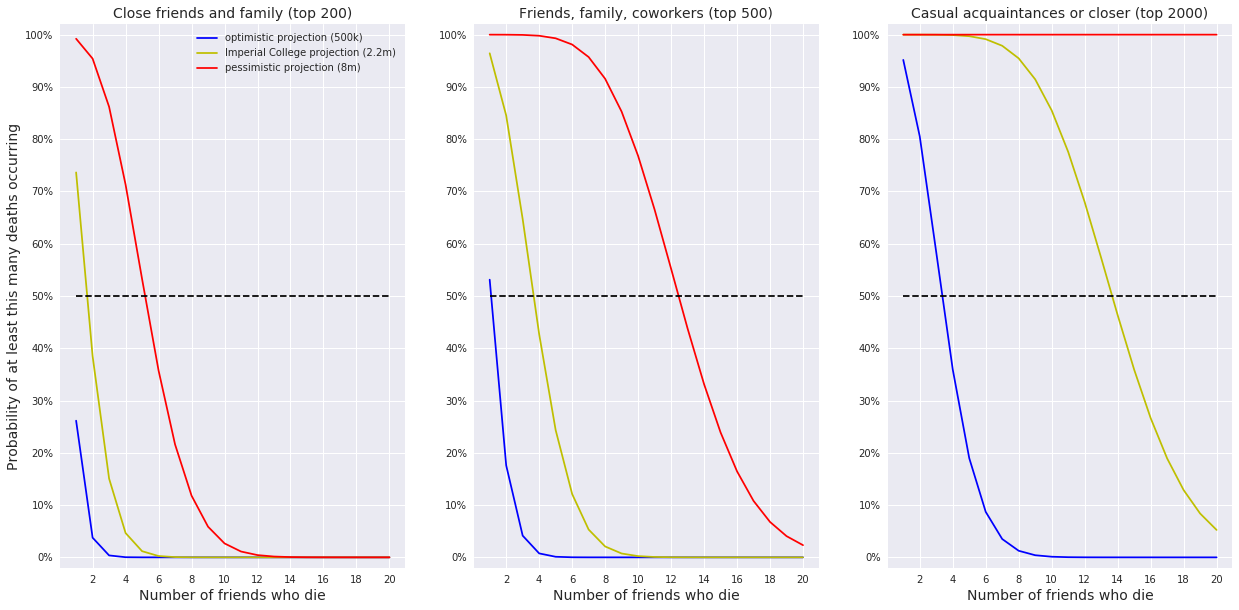

In [97]:
sns.set_style('darkgrid')

plt.figure(figsize=(21, 10))

plt.subplot(131)
plt.title('Close friends and family (top 200)', fontsize=14)
plt.plot(range(1, 21), deaths_df['close_best'], c='b')
plt.plot(range(1, 21), deaths_df['close_med'], c='y')
plt.plot(range(1, 21), deaths_df['close_worst'], c='r')
plt.plot([1, 20], [0.5, 0.5], c='k', linestyle='--')
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylim([-0.02, 1.02])
plt.xlabel('Number of friends who die', fontsize=14)
plt.ylabel('Probability of at least this many deaths occurring', fontsize=14)
plt.legend(['optimistic projection (500k)', 'Imperial College projection (2.2m)', 'pessimistic projection (8m)'])

plt.subplot(132)
plt.title('Friends, family, coworkers (top 500)', fontsize=14)
plt.plot(range(1, 21), deaths_df['med_best'], c='b')
plt.plot(range(1, 21), deaths_df['med_med'], c='y')
plt.plot(range(1, 21), deaths_df['med_worst'], c='r')
plt.plot([1, 20], [0.5, 0.5], c='k', linestyle='--')
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylim([-0.02, 1.02])
plt.xlabel('Number of friends who die', fontsize=14)

plt.subplot(133)
plt.title('Casual acquaintances or closer (top 2000)', fontsize=14)
plt.plot(range(1, 21), deaths_df['far_best'], c='b')
plt.plot(range(1, 21), deaths_df['far_med'], c='y')
plt.plot(range(1, 21), deaths_df['far_worst'], c='r')
plt.plot([1, 20], [0.5, 0.5], c='k', linestyle='--')
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
           ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylim([-0.02, 1.02])
plt.xlabel('Number of friends who die', fontsize=14)

plt.savefig('friend_deaths.jpg')
plt.show()
plt.close()